This notebook aims to explore the dataset of depression by country offered here: https://ourworldindata.org/grapher/number-of-people-with-depression?country=~OWID_WRL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
df_depressed = pd.read_csv("depression_by_country.csv")

In [3]:
df_depressed.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,595.803072
1,Afghanistan,AFG,1991,597.222321
2,Afghanistan,AFG,1992,598.844495
3,Afghanistan,AFG,1993,600.275480
4,Afghanistan,AFG,1994,600.955994


In [4]:
df_depressed.describe()

,Year,DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)
count,6468.000000,6468.000000
mean,2003.500000,444.273630
std,8.078372,120.088867
min,1990.000000,133.053547
25%,1996.750000,352.551086
50%,2003.500000,441.452651
75%,2010.250000,520.411750
max,2017.000000,945.498964


In [5]:
df_depressed.dtypes

Entity                                                                                                            object
Code                                                                                                              object
Year                                                                                                               int64
DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)    float64
dtype: object

In [8]:
# check whether the year data is complete
len(df_depressed[df_depressed["Year"] == 1990]) == len(df_depressed[df_depressed["Year"] == 2017])

231

In [16]:
df_depressed.groupby("Entity").agg("count")

,Code,Year,DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)
Entity,,,
Afghanistan,28,28,28
Albania,28,28,28
Algeria,28,28,28
American Samoa,28,28,28
Andean Latin America,0,28,28
...,...,...,...
Western Sub-Saharan Africa,0,28,28
World,28,28,28
Yemen,28,28,28


In [15]:
# double check all year data is complete
(df_depressed.groupby("Entity").agg("count")["Year"] != 28).sum()

0

In [12]:
pd.unique(df_depressed["Entity"])

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe'

All basic checks seems to suggest the dataset is complete

Some data wrangling and visualization about growth rate is provided below

In [21]:
df_depressed["count"] = df_depressed["DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)"]

In [22]:
df_plot = df_depressed.drop("DALYs (Disability-Adjusted Life Years) - Major depressive disorder - Sex: Both - Age: Age-standardized (Rate)", axis=1)
df_plot.head()

,Entity,Code,Year,count
0,Afghanistan,AFG,1990,595.803072
1,Afghanistan,AFG,1991,597.222321
2,Afghanistan,AFG,1992,598.844495
3,Afghanistan,AFG,1993,600.275480
4,Afghanistan,AFG,1994,600.955994


In [38]:
growth = df_plot[df_plot["Year"]==2017].reset_index()["count"]-df_plot[df_plot["Year"]==2007].reset_index()["count"]

In [39]:
growth.head()

0   -0.429690
1   -4.333088
2   -0.897693
3   -1.341117
4   -3.800207
Name: count, dtype: float64

In [40]:
growth_rate = growth / df_plot[df_plot["Year"]==2007].reset_index()["count"]

In [41]:
growth_rate.head()

0   -0.000712
1   -0.016986
2   -0.001809
3   -0.005039
4   -0.011453
Name: count, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Count'>

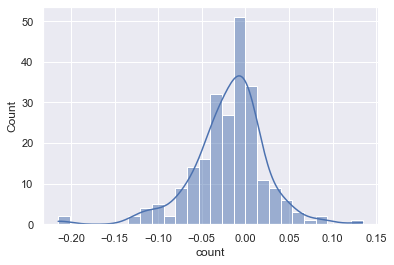

In [42]:
sns.histplot(x=growth_rate, kde=True)

The plot seems to suggest that depression rate seems to go down in the recent 10 years. We will next explore the growth from 1996 to 2006, to see whether the trend was different.

<AxesSubplot:xlabel='count', ylabel='Count'>

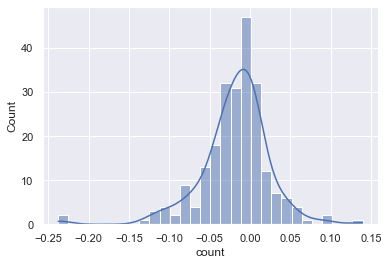

In [43]:
growth_2 = df_plot[df_plot["Year"]==2006].reset_index()["count"]-df_plot[df_plot["Year"]==1996].reset_index()["count"]
growth_rate_2 = growth / df_plot[df_plot["Year"]==1996].reset_index()["count"]
sns.histplot(x=growth_rate_2, kde=True)

A similar trend of more decrease than increase seems to show for the previous 10 years as well, despite the site suggest an overall increase world wide (https://ourworldindata.org/grapher/number-of-people-with-depression?country=~OWID_WRL). This phenomenon can be attributed to some very populous countries are encountering more depressive patients, whereas more countries with smaller population may be receiving less depressive patients